### Full Stack NLP Project
+ Emotion Detection in text
+ Text Classifier

In [39]:
#Importing EDA Packages
import numpy as np
import pandas as pd

In [40]:
#Importing Data Visualisation Packages
import seaborn as sns

In [41]:
#Importing Test Cleaning Packages
import neattext.functions as nfx

In [42]:
#Importing ML Packages
#Estimaters
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Transformers
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
#Load the Emotion dataset
df = pd.read_csv('data/emotion_dataset_raw.csv')

In [44]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [45]:
#Value counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

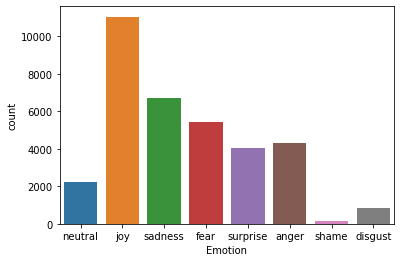

In [46]:
#plot
sns.countplot(x='Emotion',data=df)

In [47]:
#Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [48]:
#User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [49]:
#Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)


In [50]:
df


Emotion                                               Text  \
0       neutral                                             Why ?    
1           joy    Sage Act upgrade on my to do list for tommorow.   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           joy   Such an eye ! The true hazel eye-and so brill...   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...         ...                                                ...   
34787  surprise  @MichelGW have you gift! Hope you like it! It'...   
34788       joy  The world didnt give it to me..so the world MO...   
34789     anger                           A man robbed me today .    
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   
34791   sadness  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                      ?  
1                        Sage Act upgrade list tommorow.  
2      WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...  
3      eye ! true hazel eye-and brilliant ! Regular f...  
4      ugh babe.. hugggzzz u .! babe naamazed nga ako...  
...                                                  ...  
34787    gift! Hope like it! hand wear ! It'll warm! Lol  
34788    world didnt me..so world DEFINITELY cnt away!!!  
34789                                 man robbed today .  
34790                      Youu JEALOUSY, #Losing YOU...  
34791                             think baby, dream time  

[34792 rows x 3 columns]

In [51]:
# Features &Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [52]:
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [53]:
#Build Pipline 
from sklearn.pipeline import Pipeline

In [54]:
#Logistic Regression Pipeline
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr',LogisticRegression())])

In [55]:
#Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\banda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\banda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                             

In [57]:
pipe_lr

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                             

In [56]:
#Check Accuracy
pipe_lr.score(x_test,y_test)

0.6253113623299482

In [58]:
#Make A Prediction
ex1 = "This book was so intresting it made me happy"

In [59]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [61]:
#prediction Probability
pipe_lr.predict_proba([ex1])

array([[8.06384045e-03, 1.94385466e-02, 2.50481592e-02, 8.26767888e-01,
        4.41983027e-04, 1.06436588e-01, 4.13549157e-04, 1.33894454e-02]])

In [62]:
# To know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [64]:
#Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_19_september_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()